In [1]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import os
from math import pi as PI

plt.style.use('ggplot')

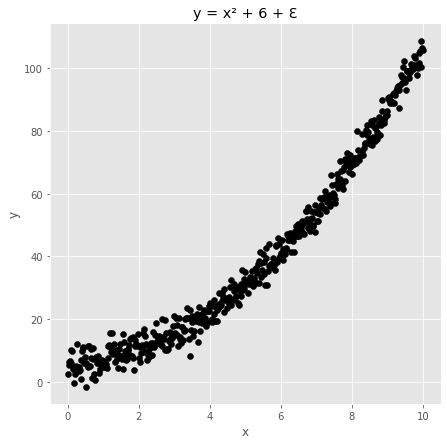

In [5]:
n_obs = 500

# observations
x = np.linspace(0, 10, num = n_obs)

# noise
eps = np.random.normal(0, 3, n_obs)

# outcome
y = x**2 + 6 + eps

# plot
fig = plt.figure(figsize=(7,7))
ax = plt.axes()
ax.set_title('y = x\u00b2 + 6 + Ɛ')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.scatter(x, y, c = 'k')

In [6]:
def split_train_val_test(x, y, train_size=0.6, val_size=0.2, test_size=0.2):
  """Splits x and y into train (x_train, y_train), validation (x_val, y_val) and test (x_test, y_test) sets.
  
  Args:
    - train_size: fraction of the original x (or y) size to be used for training.
    - val_size: fraction of the original x (or y) size to be used for validation.
    - test_size: fraction of the original x (or y) size to be used for test.
  
  Returns:
    - x_train, y_train, x_val, y_val, x_test, y_test 
  """
  assert train_size + val_size + test_size ==1.0, "The sum of train, validation and test sets fractions must be one."
  x_train, x_rem, y_train, y_rem = train_test_split(x, y,
                                                    test_size = (1.0 - train_size),
                                                    random_state = 1)
  x_val, x_test, y_val, y_test = train_test_split(x_rem, y_rem,
                                                  test_size = test_size / (1.0 - train_size),
                                                  random_state = 1)

  return x_train, y_train, x_val, y_val, x_test, y_test


x_train, y_train, x_val, y_val, x_test, y_test = split_train_val_test(x, y, 
                                                                      train_size = 0.6, 
                                                                      val_size = 0.2, 
                                                                      test_size = 0.2)

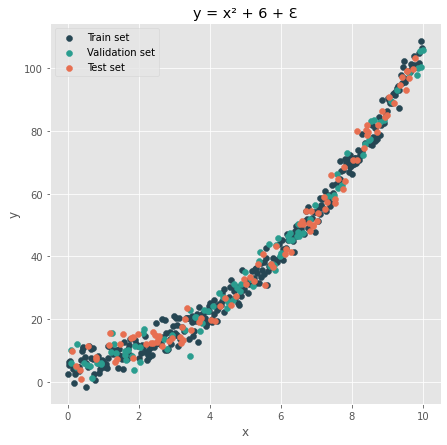

In [7]:
fig = plt.figure(figsize = (7,7))
ax = plt.axes()
ax.set_title('y = x\u00b2 + 6 + Ɛ')
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(x_train, y_train, label = "Train set", color="#264653")
ax.scatter(x_val, y_val, label = "Validation set", color="#2a9d8f")
ax.scatter(x_test, y_test, label = "Test set", color="#e76f51")
ax.legend()

In [8]:
path = "./saved_models"

def get_model_dir():
  """Returns the path where to save the current model.
  The path is as follows: './saved_models/{incremental_integer}
  Note: all sub-directories inside 'saved_models' must have an incremental integer as name
  
  Returns:
    - Path to save a new model (str) 
  """
  # create 'saved_models' directory if it does not exist
  if not os.path.exists(path):
    os.makedirs(path)

  # check for model directories inside 'saved_models'
  model_dirs = [int(i) for i in os.listdir(path)]

  # if there is no prior model, current model has version 1
  # otherwise, current model version is highest available version incremented by 1 
  current_model = "1" if len(model_dirs)==0 else str(max(model_dirs)+1)

  return path + "/" + current_model + "/"


def train_save_model(model, n_epochs = 10, early_stop_patience = 2, learning_rate = 0.001):
  """Fits input model, plots training history, saves model in numbered folder"""
  model.compile(tf.keras.optimizers.SGD(learning_rate, 0.9), loss = "mse")
  early_stop = tf.keras.callbacks.EarlyStopping(monitor = "val_loss",
                                                patience = early_stop_patience)
  # fit the model
  model_fit = model.fit(x_train, 
                        y_train,
                        epochs = n_epochs,
                        validation_data = (x_val, y_val),
                        callbacks=[early_stop])
  # plot training history
  plt.plot(model_fit.history["loss"], label="loss")
  plt.plot(model_fit.history["val_loss"], label="val_loss")
  plt.legend()

  # save model
  path = get_model_dir()
  model.save(path)

Epoch 1/50
10/10 [==============================] - 1s 58ms/step - loss: 1097.9463 - val_loss: 761.4348
Epoch 2/50
10/10 [==============================] - 0s 8ms/step - loss: 500.6961 - val_loss: 145.9170
Epoch 3/50
10/10 [==============================] - 0s 9ms/step - loss: 211.4884 - val_loss: 88.1350
Epoch 4/50
10/10 [==============================] - 0s 10ms/step - loss: 120.4308 - val_loss: 99.1417
Epoch 5/50
10/10 [==============================] - 0s 7ms/step - loss: 98.0882 - val_loss: 86.4756
Epoch 6/50
10/10 [==============================] - 0s 8ms/step - loss: 87.2315 - val_loss: 87.9124
Epoch 7/50
10/10 [==============================] - 0s 16ms/step - loss: 86.2039 - val_loss: 79.9529
Epoch 8/50
10/10 [==============================] - 0s 14ms/step - loss: 83.1681 - val_loss: 79.7589
Epoch 9/50
10/10 [==============================] - 0s 18ms/step - loss: 81.1185 - val_loss: 77.1601
Epoch 10/50
10/10 [==============================] - 0s 16ms/step - loss: 78.8790 - val_

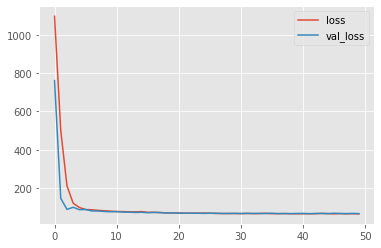

In [9]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_dim=1)
])

train_save_model(model1, 
                 n_epochs = 50, 
                 early_stop_patience = 5)

Epoch 1/1000
10/10 [==============================] - 0s 18ms/step - loss: 944.3774 - val_loss: 313.6997
Epoch 2/1000
10/10 [==============================] - 0s 5ms/step - loss: 184.0772 - val_loss: 70.2870
Epoch 3/1000
10/10 [==============================] - 0s 6ms/step - loss: 149.4570 - val_loss: 189.0544
Epoch 4/1000
10/10 [==============================] - 0s 5ms/step - loss: 86.0940 - val_loss: 52.7511
Epoch 5/1000
10/10 [==============================] - 0s 6ms/step - loss: 48.4246 - val_loss: 52.7989
Epoch 6/1000
10/10 [==============================] - 0s 6ms/step - loss: 54.6213 - val_loss: 41.5351
Epoch 7/1000
10/10 [==============================] - 0s 6ms/step - loss: 46.1317 - val_loss: 44.6409
Epoch 8/1000
10/10 [==============================] - 0s 4ms/step - loss: 44.5538 - val_loss: 38.4457
Epoch 9/1000
10/10 [==============================] - 0s 5ms/step - loss: 41.3077 - val_loss: 51.7754
Epoch 10/1000
10/10 [==============================] - 0s 6ms/step - loss: 4

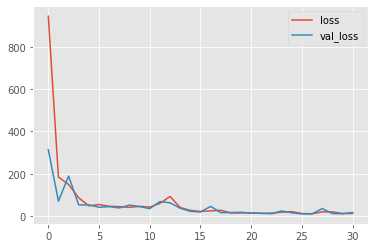

In [10]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1000, activation='relu', input_dim=1),
    tf.keras.layers.Dense(1)
])

train_save_model(model2, 
            n_epochs = 1000, 
            early_stop_patience = 5)

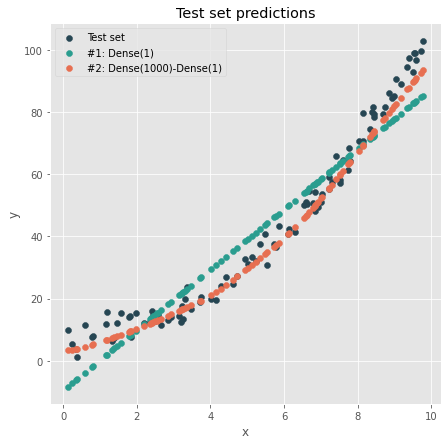

In [11]:
fig = plt.figure(figsize = (7,7))
ax = plt.axes()
ax.set_title('Test set predictions')
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(x_test, y_test, label = "Test set", color="#264653")
ax.scatter(x_test, model1.predict(x_test), label = "#1: Dense(1)", color="#2a9d8f")
ax.scatter(x_test, model2.predict(x_test), label = "#2: Dense(1000)-Dense(1)", color="#e76f51")
ax.legend()

In [16]:
!pip install docker

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 146 kB 8.8 MB/s 
     |████████████████████████████████| 54 kB 3.4 MB/s 


In [21]:
!docker images

/bin/bash: docker: command not found
